<a href="https://colab.research.google.com/github/heugyu/notebook/blob/master/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Pytorch 패키지 설치
!pip3 install torch

In [20]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [7]:
x = torch.tensor([[1,2,3,], [4,5,6], [7,8,9]])
print(x.size())
print(x.shape)
# 차원 정보 
print(x.ndimension())

# unsqueeze(), squeeze(), view() 함수로 텐서의 랭크와 shape의 인위적 변경 가능 

torch.Size([3, 3])
torch.Size([3, 3])
2


In [9]:
# 정규분포에서 무작위로 값을 뽑아 텐서를 생성하는 randn()
w = torch.randn(5, 3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

print(w.size())
print(x.size())

print(w)
print(x)

# 행렬곱은 torch.mm() 함수 사용 -> matmul
wx = torch.mm(w,x)
print(wx.size())
print(wx)

# (5, 3) * (3 ,2) = (5, 2)

torch.Size([5, 3])
torch.Size([3, 2])
tensor([[-0.5459,  0.1215, -0.6685],
        [-0.3041, -0.0787, -1.6572],
        [-0.0633, -1.0126, -0.3969],
        [ 0.4379, -0.3911,  0.1603],
        [ 0.5228,  0.0526,  0.3264]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([5, 2])
tensor([[ -3.5240,  -4.6168],
        [ -8.8260, -10.8659],
        [ -5.0854,  -6.5582],
        [  0.0660,   0.2732],
        [  2.3127,   3.2146]])


### Autograd
- 데이터의 정답(ground_truth)과 모델이 예측한 결과의 차이를 산술적으로 표현한 거리(distance)
- 학습 데이터로 계산한 거리들의 평균을 오차(loss)
- 오차가 작은 모델일수록 정확한 모델 
- 오차를 최소화 하는 알고리즘 중 기본 -> 경사하강법(gradient decent)
- 경사하강법, 오차를 수학 함수로 표현 후 미분하여 함수의 기울기를 구해 loss가 최소가 되는 방향을 찾는 알고리즘
- **Pytorch의 Autograd는 미분 계산을 자동화 하여 경사 하강법을 구현 하는 수고를 덤**

In [11]:
# requires_grad = True
# Pytorch의 Autograd 기능이 자동으로 계산할 때 w에 대한 미분값을 w.grad에 저장
w = torch.tensor(1.0, requires_grad=True)
a = w * 3
l = a ** 2

# l을 w로 미분하려면 연쇄법칙을 이용하여 a와 w로 차례대로 미분 
# backward() 함수
l.backward()
print(w.grad)

tensor(18.)


### 인공신경망 (ANN)
- 인공신경망(artificial neural network)은 인간의 뇌, 혹은 신경계의 작동 방식에서 영감
![image](https://user-images.githubusercontent.com/60495142/75842561-f968b580-5e13-11ea-98ac-c7a2eb755651.png)

- 각 층에 존재하는 매개변수인 가중치(weight)에 행렬곱
- 편향(bias)을 더해주는 것
- 가중치는 입력 신호가 출력에 주는 영향을 계산하는 매개변수
- 편향은 각 노드가 얼마나 데이터에 민감한지 알려주는 매개변수
- 행렬곱의 결과는 활성화 함수(activation function)을 거쳐 결과값 산출
- 인공 신경망의 출력층의 결과값과 정답의 오차를 계산하여 출력층의 가중치 부터 입력층의 가중치 까지 모두 경사하강법을 활용해 변경
- 뒤에서 부터 차례대로 조정하고 최적화 하는 알고리즘 역전파(Backpropagation)

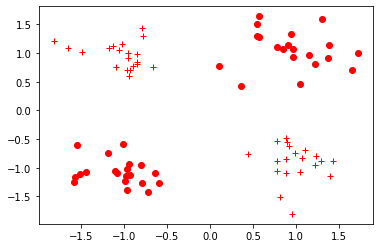

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import make_blobs

## 데이터셋 생성 
n_dim = 2
# make_blobs() 함수는 예제용 데이터셋을 만들어주는 함수
x_train, y_train = make_blobs(
    n_samples=80,
    n_features=n_dim,
    centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
    shuffle=True,
    cluster_std=0.3
)

x_test, y_test = make_blobs(
    n_samples=20,
    n_features=n_dim,
    centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
    shuffle=True,
    cluster_std=0.3
)

def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

## 생성된 데이터셋 시각화
def vis_data(x, y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c + 'o' if y_ == 0 else c + '+')
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [19]:
# 생성한 넘파이 벡터 형식 데이터를 파이토치 텐서로 변경
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# 파이토치에서 신경망은 신경망 모듈(torch.nn.Module)을 상속 받는 파이썬 클래스로 정의
## 신경망 모델 정의
class NeuralNet(torch.nn.Module):
    # super() 함수를 부르면 NeuralNet 클래스는 파이토치의 nn.Module 클래스의 속성들을 가지고 초기화
    # input_size는 신경망에 입력되는 데이터의 차원
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        # 인공신경망을 거치는 연산을 정의
        # torch.nn.Linear() 함수는 행렬곱과 편향을 포함하는 연산을 지원하는 객체
        # relu, sigmoid는 활성화 함수 
        self.liner_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.liner_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        # 정의한 동작들을 차례대로 실행
        # lear_1은 입력데이터에 [input_size, hidden_size] 크기의 가중치를 행렬곱하고 편향을 더하여 [1, hidden_size] 꼴의 텐서 반환
        # 반환된 텐서에 relu 활성화 함수 적용 -> 입력값이 0보다 작으면 0, 0보다 크면 입력값 그대로 출력
        # linear_2로 정의된 행렬곱을 거쳐 [1, 1] 꼴로 변환 
        # sigmoid 활성화 함수에 적용 -> 0~1 사이의 값을 반환 
        linear1 = self.liner_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.liner_2(relu)
        output = self.sigmoid(linear2)
        return output

## 신경망 모델 생성 및 관련 변수와 알고리즘 정의
# 신경망  객체를 생성하고 학습에 필요한 여러 변수와 알고리즘 정의
model = NeuralNet(2,5)
learning_rate = 0.03

# 오차 함수 -> 이진 교차 엔트로피 (binary cross entropy)
criterion = torch.nn.BCELoss()
epochs = 2000
# 새 가중치 = 가중치 - 학습률 * 가중치에 대한 기울기
# optimizer는 step() 함수를 부를 때마다 가중치를 학습률만큼 갱신
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

## 학습 전 모델 성능 평가 
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
# item() 함수는 텐서 속의 숫자를 스칼라 값으로 반환
print(test_loss_before.item())

## 신경망 학습 
for epoch in range(epochs):
    model.train()
    # 에폭마다 새로운 경사값을 계산할 것이므로 zero_grad() 함수를 호출해 경사값을 0으로 설정 
    optimizer.zero_grad()
    # 앞서 생성한 모델에 학습 데이터를 입력해 결과값 계산 
    # 신경망 모델 클래스에 정의한 forward() 함수가 신경망의 결과값을 내는 함수
    # torch.nn.module이 forward() 함수를 대신 호출
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print(f'Train loss at {epoch} is {train_loss.item()}')
    # 오차 함수를 가중치로 미분하여 오차가 최소가 되는 방향 구함
    # 그 방향으로 모델을 학습률 만큼 이동 
    # 역전파 코드 
    train_loss.backward()
    optimizer.step()

## 학습 후 모델 성능 평가 
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(test_loss.item())

## 학습된 가중치 저장 
# 학습된 모델을 state_dict() 함수 형태로 바꾸어 .pt로 저장 
# state_dict() 함수는 모델 내 가중치들이 딕셔너리 형태로 
#{연산이름:가중치 텐서와 편향텐서}
# torch.save(model.state_dict(), './model.pt')

## 저장된 가중치 불러와 새로운 모델에 적용(전이 학습)
# new_model = NeuralNet(2, 5)
# new_model.load_state_dict(torch.load('./model.pt'))
# new_model.eval()


0.7031499147415161
Train loss at 0 is 0.6978460550308228
Train loss at 100 is 0.5836606025695801
Train loss at 200 is 0.45631012320518494
Train loss at 300 is 0.3186921775341034
Train loss at 400 is 0.21442434191703796
Train loss at 500 is 0.14858084917068481
Train loss at 600 is 0.1082814559340477
Train loss at 700 is 0.08318857848644257
Train loss at 800 is 0.06657259166240692
Train loss at 900 is 0.05499807745218277
Train loss at 1000 is 0.04658583551645279
Train loss at 1100 is 0.04029931128025055
Train loss at 1200 is 0.03542359545826912
Train loss at 1300 is 0.03153332322835922
Train loss at 1400 is 0.02836519107222557
Train loss at 1500 is 0.025739187374711037
Train loss at 1600 is 0.023530926555395126
Train loss at 1700 is 0.02165025658905506
Train loss at 1800 is 0.020029939711093903
Train loss at 1900 is 0.018620384857058525
0.036126069724559784
